Pandas is a popular Python module that provides high performance data 
structures and data analysis tools. Pandas is widely used to transform 
raw data for data analysis and machine learning. We will learn: 

• data frames and data series 

• reading from files 

• data transformation 

• data visualization 

• statistical analysis

Wes McKinney developed on Pandas and open sourced it in 2009. Later Chang She become the primary contributor. 

## Data frames and Data series

Series - is a one-dimensional Python object that corresponds to one column 
in a table.

In [2]:
'''
First things first, let's import pandas
'''
import pandas as pd

Creating a data series from a list

In [2]:
list1 = ['Grapes', 'Apples', 'Oranges', 'Bananas']
s1 = pd.Series(list1)
print(s1, type(s1))

0     Grapes
1     Apples
2    Oranges
3    Bananas
dtype: object <class 'pandas.core.series.Series'>


Notice that rows are given numbers, these numbers are known as indices. Indices starts from 0 and go up.  

We can provide custom index as well. 

In [3]:
# defining list2 with indices
list2 = ['GR', 'AP', 'OR', 'BA']

# In series1 we say index=list2
series1 = pd.Series(list1, index=list2)
print(series1)

GR     Grapes
AP     Apples
OR    Oranges
BA    Bananas
dtype: object


Now let us define a dictionary and convert it into a series.

In [4]:
d1 = {'Z': 'Zynga', 'U': 'Uber', 'G':'Google'}
ds1 = pd.Series(d1)
print(ds1)

Z     Zynga
U      Uber
G    Google
dtype: object


In [5]:
list1 = [1, 4, -11]
print(list1[1])


4


In [6]:
import numpy as np

In [7]:
a = np.arange(10, 15)
print(a)
print(a[4])
print(np.mean(a))


[10 11 12 13 14]
14
12.0


In [8]:
b = np.arange(20, 30)
print(b)

c = b.reshape(2, 5)
print(c)

[20 21 22 23 24 25 26 27 28 29]
[[20 21 22 23 24]
 [25 26 27 28 29]]


Let's create a series with company name as index and its current stock price as 
value. Notice that in the code below, we have a dictionary with two keys 
having None as their values.

In [9]:
d2 = {'Amazon': 852, 'Nvidia': None, 'Alphabet': 856, 'Toyota': '112', \
    'GE': 29, 'Ford': 12, 'Marriot': None, 'amazon': 1000}
print(d2)
companies = pd.Series(d2, name='Price')
print(companies)

{'Amazon': 852, 'Nvidia': None, 'Alphabet': 856, 'Toyota': '112', 'GE': 29, 'Ford': 12, 'Marriot': None, 'amazon': 1000}
Amazon       852
Nvidia      None
Alphabet     856
Toyota       112
GE            29
Ford          12
Marriot     None
amazon      1000
Name: Price, dtype: object


Using the index we can get the corresponding stock prices. Below we are 
retrieving the stock price of Ford.

In [10]:
print(companies['Ford'])

12


We can also get stock prices for more companies. We have to supply the indices 
that we are interested in as a list.

In [11]:
print(companies[['Ford', 'GE']])

Ford    12
GE      29
Name: Price, dtype: object


Membership can be checked using the 'in' keyword.

In [12]:
print('Amazon' in companies)
print('Apple' in companies)

True
False


If we want to know companies for which we don't have stock price, then we have 
to use the is.null(). True will be returned for the indices that don't have a 
value and False for the indices that have 
a value.

In [13]:
print(companies.isnull())

Amazon      False
Nvidia       True
Alphabet    False
Toyota      False
GE          False
Ford        False
Marriot      True
amazon      False
Name: Price, dtype: bool


#### A dataframe is a tabular data structure that consists of rows and columns. 
#### Dataframe is nothing but a collection of series.

Let's create a dataframe using a dictionary as shown below.

In [4]:
c1= {'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
            'Founded': [1994, 1923, 1937, 2006, 1903, 1927], 
             'Price': [852, 111.2, 112, 15.2, 12.5, 88.31]}

companies = pd.DataFrame(c1, columns=['Name', 'Founded', 'Price'])
print(companies)

      Name  Founded   Price
0   Amazon     1994  852.00
1       GE     1923  111.20
2   Toyota     1937  112.00
3  Twitter     2006   15.20
4     Ford     1903   12.50
5  Marriot     1927   88.31


In [15]:
c1= {'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
            'Founded': [1994, 1923, 1937, 2006, 1903, 1927], 
             'Price': [852, 111.2, 112, 15.2, 12.5, 88.31]}

companies = pd.DataFrame(c1)
print(companies)

      Name  Founded   Price
0   Amazon     1994  852.00
1       GE     1923  111.20
2   Toyota     1937  112.00
3  Twitter     2006   15.20
4     Ford     1903   12.50
5  Marriot     1927   88.31


In [16]:
"""
In-class activity: Create a data series which comprises of names of 6 
US capitals. Print the contents of the data series.
"""
capitals = ["Sacramento","Boston", "Austin", "Denver", "Phoenix"]
capseries = pd.Series(capitals)
print(capseries, type(capseries))

0    Sacramento
1        Boston
2        Austin
3        Denver
4       Phoenix
dtype: object <class 'pandas.core.series.Series'>


In [17]:
"""
In-class activity: To the above data series include state of 
each capital as an index. 
"""
state = ["CA", "MA", "TX", "CO", "AZ"]
capstate = pd.Series(capitals, index=state)
print(capstate)

CA    Sacramento
MA        Boston
TX        Austin
CO        Denver
AZ       Phoenix
dtype: object


In [61]:
# Trying Bingjie's code

capital_list = ['Springfield','Austin','Albany','Sacramento','WHAT','WHAT_1']
list_1 = pd.Series(capital_list)
print(list_1,type(list_1))
# defining list_2 with indices
list_2 = ["IL","TX","NY","CA", "W1","W2"]

s_2 = pd.Series(capital_list, index = list_2)
print(s_2)

0    Springfield
1         Austin
2         Albany
3     Sacramento
4           WHAT
5         WHAT_1
dtype: object <class 'pandas.core.series.Series'>
IL    Springfield
TX         Austin
NY         Albany
CA     Sacramento
W1           WHAT
W2         WHAT_1
dtype: object


## Reading files

Reading a csv file. 

In [63]:
movies = pd.read_csv('alldata/imdb_movie/movie_metadata.csv')
print(movies.head(3))

   color   director_name  num_critic_for_reviews  duration  \
0  Color   James Cameron                   723.0     178.0   
1  Color  Gore Verbinski                   302.0     169.0   
2  Color      Sam Mendes                   602.0     148.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.

In [20]:
print(movies.head(2))

   color   director_name  num_critic_for_reviews  duration  \
0  Color   James Cameron                   723.0     178.0   
1  Color  Gore Verbinski                   302.0     169.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1    

In [21]:
print(movies.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [22]:
print(movies.dtypes)

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [23]:
print(movies.shape)

(5043, 28)


In [24]:
# for number of rows use shape[0]
print(movies.shape[0])

5043


In [25]:
# for number of columns use shape[1]
print(movies.shape[1])

28


In [26]:
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


We can create a series from the movies dataframe. 

In [68]:
movies_dir = movies['director_name']
print(movies_dir.head())

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object


In [28]:
print(type(movies_dir))

<class 'pandas.core.series.Series'>


Let's create a new dataframe with columns: 
movie_title, duration, budget, gross, genres, director_name.

In [69]:
newmovies = movies[['movie_title', 'duration', 'budget', 'gross',\
                    'genres', 'director_name']]
print(newmovies.head(), type(newmovies))

                                         movie_title  duration       budget  \
0                                            Avatar      178.0  237000000.0   
1          Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                           Spectre      148.0  245000000.0   
3                             The Dark Knight Rises      164.0  250000000.0   
4  Star Wars: Episode VII - The Force Awakens    ...       NaN          NaN   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
4          NaN                      Documentary        Doug Walker   <class 'pandas.core.frame.DataFrame'>


In [30]:
print(newmovies.shape)

(5043, 6)


We can use sort_values() to sort a dataframe.

In [71]:
print(newmovies.sort_values('director_name').head())

               movie_title  duration      budget       gross  \
4605  The Helix... Loaded       97.0   1000000.0         NaN   
4314               Circle       87.0         NaN         NaN   
3497              Get Low      100.0   7500000.0   9176553.0   
2182           Date Movie       85.0  20000000.0  48546578.0   
2909          The Funeral       99.0  12500000.0   1227324.0   

                                      genres    director_name  
4605  Action|Adventure|Comedy|Fantasy|Sci-Fi    A. Raven Cruz  
4314    Drama|Horror|Mystery|Sci-Fi|Thriller       Aaron Hann  
3497                           Drama|Mystery  Aaron Schneider  
2182                          Comedy|Romance    Aaron Seltzer  
2909                             Crime|Drama     Abel Ferrara  


Notice that not all values in our data frame are finite. So, now we want to drop 
rows that have NaN in any column. 

## Data Transformation

In [32]:
newmovies1 = newmovies.copy(deep=True)
newmovies1.dropna(how='any', inplace=True)
print(newmovies1.head())
print(newmovies1.shape)

                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  
(3890, 6)


In [33]:
newmovies2 = newmovies.copy(deep=True)
newmovies2.(subset=['duration','budget'], how='any', inplace=True)

In [34]:
print(newmovies2.head())

                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  


In [35]:
print(newmovies2.shape)

(4546, 6)


In [75]:
new_gross = newmovies[newmovies['gross']>350000000]
print(new_gross.shape)
print(new_gross.head())

(35, 6)
                                    movie_title  duration       budget  \
0                                       Avatar      178.0  237000000.0   
3                        The Dark Knight Rises      164.0  250000000.0   
8                      Avengers: Age of Ultron      141.0  250000000.0   
13  Pirates of the Caribbean: Dead Man's Chest      151.0  225000000.0   
17                                The Avengers      173.0  220000000.0   

          gross                           genres      director_name  
0   760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
3   448130642.0                  Action|Thriller  Christopher Nolan  
8   458991599.0          Action|Adventure|Sci-Fi        Joss Whedon  
13  423032628.0         Action|Adventure|Fantasy     Gore Verbinski  
17  623279547.0          Action|Adventure|Sci-Fi        Joss Whedon  


## Statistical Analysis

In [81]:
print(newmovies1.describe())   # movie_title, genres, director_name cannot be analyzed this way, not included

          duration        budget         gross
count  3890.000000  3.890000e+03  3.890000e+03
mean    109.896401  4.520391e+07  5.106809e+07
std      22.706775  2.224177e+08  6.980668e+07
min      34.000000  2.180000e+02  1.620000e+02
25%      95.000000  1.000000e+07  6.844452e+06
50%     106.000000  2.400000e+07  2.799697e+07
75%     120.000000  5.000000e+07  6.540649e+07
max     330.000000  1.221550e+10  7.605058e+08


In [38]:
print(movies.describe())

       num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  

We can find how many values in each column of newmovies has NAN using isnull().

In [39]:
print(newmovies.isnull().sum())

movie_title        0
duration          15
budget           492
gross            884
genres             0
director_name    104
dtype: int64


In [40]:
newmovies3 = newmovies.copy(deep=True)
newmovies3['duration'].fillna(value=90, inplace=True)
print(newmovies3.isnull().sum())

movie_title        0
duration           0
budget           492
gross            884
genres             0
director_name    104
dtype: int64


In [41]:
"""
In-class activity: From the movies data frame, create a new data 
frame that comprises of movie title, duration, budget and gross. 
1) Find the number of NaN in gross. 
2) Replace NaN in gross with the mean of gross.
"""

movies_short = movies[["movie_title", "duration", "budget", "gross"]]

In [42]:
print(movies_short.shape)

(5043, 4)


In [43]:
movies_short["gross"].isnull().sum()

884

In [82]:
mean_gross = movies_short["gross"].mean()
print(mean_gross)
movies_short["gross"].fillna(value=mean_gross, inplace=True)
print(movies_short["gross"].isnull().sum())

48468407.52680692
0


In [45]:
url= "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries=pd.read_csv(url)

In [46]:
print(countries.head())
print(countries.shape)
print(countries.shape[0])

    Country  Region
0   Algeria  AFRICA
1    Angola  AFRICA
2     Benin  AFRICA
3  Botswana  AFRICA
4   Burkina  AFRICA
(194, 2)
194


In [47]:
print(countries.dtypes)

Country    object
Region     object
dtype: object


In [48]:
print(countries.describe())

          Country  Region
count         194     194
unique        194       6
top     Argentina  AFRICA
freq            1      54


## Data Visualization 

The below line will make sure that the image created by the mathplot will be 
shown inside Jupyter notebook.

In [49]:
%matplotlib inline

Let us plot a histogram for duration time.

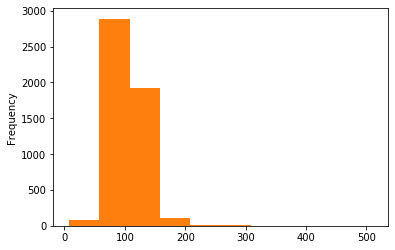

In [87]:
newmovies3['duration'].plot(kind='hist')   #
newmovies3.duration.plot(kind='hist')

Let's consider another dataset to understand different plotting choices. 

In [51]:
company = pd.read_csv('company.csv')
print(type(company))
print("++++")
print(company.head())

<class 'pandas.core.frame.DataFrame'>
++++
  Name  sales_budget  marketing_budget  Income
0  PLP           123                90     400
1   MX           340                85     700
2   YP            45                55     210
3   UP            27                60     200
4   QT            80               100     225


In [52]:
company = pd.read_csv('company.csv')
company = company.set_index('Name')
print(company.head())

      sales_budget  marketing_budget  Income
Name                                        
PLP            123                90     400
MX             340                85     700
YP              45                55     210
UP              27                60     200
QT              80               100     225


We plot a scatter plot between the columns sales_budget and marketing_budget.

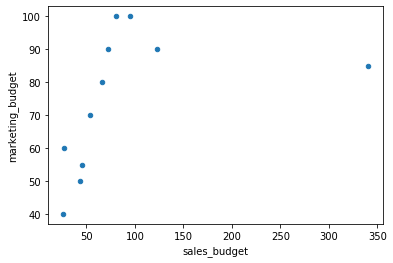

In [53]:
company.plot(kind='scatter', x='sales_budget', y='marketing_budget')

Creating a series with column sales_budget.

In [101]:
sales = company['sales_budget']
print(sales, type(sales))

Name
PLP    123
MX     340
YP      45
UP      27
QT      80
AD      95
XC      26
MA      72
GP      66
LA      54
WT      43
Name: sales_budget, dtype: int64 <class 'pandas.core.series.Series'>


Text(0, 0.5, 'Sales')

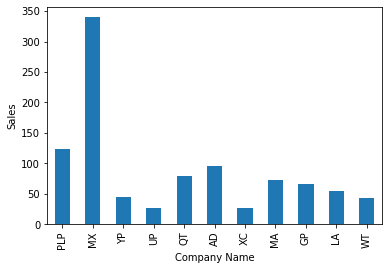

In [99]:
sales_plot = sales.plot(kind='bar')   # 'sales' is not a dataframe, .plot works differently here
sales_plot.set_xlabel("Company Name")   # .set_xlabel used
sales_plot.set_ylabel("Sales")   # .set_ylabel used

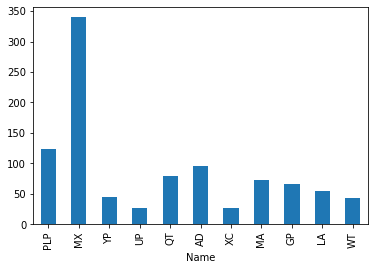

In [106]:
sales.plot(kind='bar', x="Company Name", y="Sales")   # 'sales' is not a dataframe, .plot() does not work here

In [107]:
"""
In-class activity: 
1) Use the companies data frame and create a data 
series with company name and marketing budget. 
2) Create a bar graph with company name on the x-axis and 
marketing budget on the y-axis. 
"""

'\nIn-class activity: Use the companies data frame and create a data \nseries with company name and marketing budget. \n1) Create a bar graph with company name on the x-axis and \nmarketing budget on the y-axis. \n'

In [58]:
marketing = company["marketing_budget"]
print(marketing.head())

Name
PLP     90
MX      85
YP      55
UP      60
QT     100
Name: marketing_budget, dtype: int64


Text(0, 0.5, 'Marketing budget')

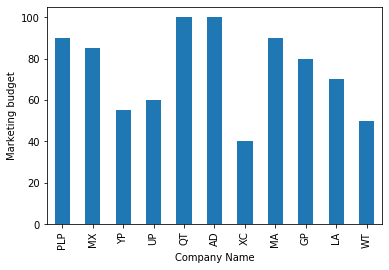

In [59]:
marketing_plot = marketing.plot(kind='bar')
marketing_plot.set_xlabel("Company Name")
marketing_plot.set_ylabel("Marketing budget")